# Table of Contents
[Introduction](#Introduction)   
- [Preview of Datasets](#Preview-of-Datasets)  
    - [movie dataset](#movie-dataset)   
    - [credits dataset](#credits-dataset)   
    
[Data Cleaning](#Data-Cleaning)   
- [Merge movie and credits dataset](#Merge-movie-and-credits-dataset)  
- [Unnecessary Columns](#Unnecessary-Columns)   
- [Data Types](#Data-Types)   
- [Lists and Dictionaries](#Lists-and-Dictionaries)   
- [Null Values](#Null-Values)   
- [New Features](#New-Features)   
    - [ROI](#ROI)   
    - [release year and month](#release-year-and-month)   
    
[Data Exploration](#Data-Exploration)   
- [Overview](#Overview)   
- [Runtime](#Runtime)   
    - [Compare runtime against budget, revenue and ROI](#Compare-runtime-against-budget,-revenue-and-ROI)   
- [Revenue](#Revenue)   
- [Movie Success](#Movie-Success) 
    - [Highest Return of Investment movies](#Highest-Return-of-Investment-movies)   
    - [Lowest Return of Investment movies](#Lowest-Return-of-Investment-movies)   
- [Production Companies](#Production-Companies)   
- [Genres](#Genres)    
    - [Genre Revenue](#Genre-Revenue)   
    - [Genre Budget](#Genre-Budget)   
    - [Genre Popularity](#Genre-Popularity)   
- [Budget](#Budget)   
    - [Budget against revenue and ROI](#Budget-against-revenue-and-ROI)   

[Regression](#Regression)    
- [Correlation Matrix](#Correlation-Matrix)
- [Grid Search](#Grid-Search)    
- [GradientBoostingRegressor](#GradientBoostingRegressor)    
- [Coefficient of Determination](#Coefficient-of-Determination)    

# Introduction

This project uses metadata from TMDb on movies released on or before 2017. The dataset is from Kaggle which can be found [here](https://www.kaggle.com/tmdb/tmdb-movie-metadata). In this analysis I will explore different features of a movie such as genres, budget, revenue and runtime. I will also build a regression model to predict the revenue of a movie based on its features.

In [2]:
import pandas as pd
import numpy as np
from ast import literal_eval
import ast

In [3]:
# load datasets
movie_data = pd.read_csv("tmdb_5000_movies.csv")
credits_data = pd.read_csv("tmdb_5000_credits.csv")

## Preview of datasets

### movie dataset

In [4]:
# display first few rows of the movie dataset
movie_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
movie_data.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [6]:
print("The movie dataset has {} rows and {} columns."
      .format(len(movie_data), len(movie_data.columns))
     )

The movie dataset has 4803 rows and 20 columns.


### credits dataset

In [7]:
credits_data.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
print("The credits dataset has {} rows and {} columns."
      .format(len(credits_data), len(credits_data.columns))
     )

The credits dataset has 4803 rows and 4 columns.


# Data Cleaning

### Merge movie and credits dataset

Merge the movie and credits datasets into one dataset joining on the TMDb movie id

In [9]:
credits_data.drop('title', axis=1, inplace=True)

# join movie and credits data
data = pd.merge(movie_data, credits_data, left_on='id', right_on='movie_id')

In [10]:
print("The merged dataset has {} rows and {} columns.".format(len(data), len(data.columns)))

The merged dataset has 4803 rows and 23 columns.


## Unnecessary Columns and Rows

Dropping columns that provide no useful information to the analysis

In [11]:
data = data.drop(columns=['homepage', 'original_title','original_language', 'id', 'movie_id'])

#### Movie Status

In [12]:
data['status'].value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

In [13]:
non_released = data[(data['status'] == 'Post Production') | (data['status'] == 'Rumored')][['budget', 'revenue', 'title']]
non_released

,budget,revenue,title
2906,0,0,Dancin' It's On
4169,1900000,0,Brotherly Love
4178,2000000,841733,Higher Ground
4401,0,0,The Helix... Loaded
4453,0,0,Crying with Laughter
4508,56000,0,The Harvest (La Cosecha)
4662,0,0,Little Big Top
4754,0,0,The Naked Ape


There are only 8 rows catagorized as rumored/ Post production and most of them have missing values for revenue and budget. These rows does not provide any meaningful insight to the analysis so I choose to remove them from the dataframe.

In [14]:
index = non_released.index
data = data.drop(index)

## Data Types

In [15]:
data.dtypes

budget                    int64
genres                   object
keywords                 object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
dtype: object

- convert release date column to datetime

In [16]:
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

## Lists and Dictionaries

some columns have values stored in lists or dictionaries. I will modify theses columns to contain only information needed for the analysis.

In [17]:

cols = ['genres', 'spoken_languages', 'production_countries', 'production_companies', 'keywords', 'cast', 'crew']
for col in cols:
    data[col] = (
    data[col]
    .fillna("[]")
    .apply(ast.literal_eval)
    .apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
    )

## Null Values

In [18]:
print("{} out of {} entries in the revenue column is 0."
      .format(len(data[data['revenue']==0]), len(data['revenue']))
     )

1420 out of 4795 entries in the revenue column is 0.


In [19]:
print("{} out of {} entries in the budget column is 0."
      .format(len(data[data['budget']==0]), len(data['budget']))
     )

1032 out of 4795 entries in the budget column is 0.


The value of 0 is a placeholder for unreported revenue and budget, thus I will change the 0's in these columns to NA

In [20]:
cols = ['revenue', 'budget']
for col in cols:
    data[col] = data[col].replace(0, np.nan)

## New Features

### ROI

Add a new column ROI representing the return of investment. Calculated by   
$ROI = \frac{(revenue - cost)}{cost}$

In [21]:
data['ROI'] = (data['revenue'] - data['budget'])/data['budget']

### release year and month

Convert the release date into year and month

In [22]:
data['year'] = pd.DatetimeIndex(data['release_date']).year
data['month'] = pd.DatetimeIndex(data['release_date']).strftime("%b")
data = data.drop(columns=['release_date'])

In [23]:
data.head()

,budget,genres,keywords,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,ROI,year,month
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2.787965e+09,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B...",10.763566,2009.0,Dec
1,300000000.0,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],9.610000e+08,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...",2.203333,2007.0,May
2,245000000.0,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",8.806746e+08,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Thomas Newman, Sam Mendes, Anna Pinnock, John...",2.594590,2015.0,Oct
3,250000000.0,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],1.084939e+09,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Hans Zimmer, Charles Roven, Christopher Nolan...",3.339756,2012.0,Jul
4,260000000.0,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2.841391e+08,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, John Lasseter...",0.092843,2012.0,Mar


# Data Exploration

In [24]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

## Overview

Displaying common words from movie overviews as a word cloud

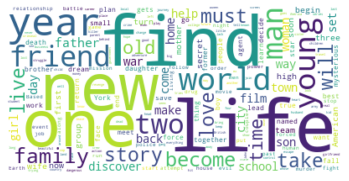

In [25]:
stopwords = set(STOPWORDS)
data['overview'] = data['overview'].astype('str')
overview_text = " ".join(data['overview'])
keywords_cloud = WordCloud(stopwords=stopwords,
                           collocations=False,
                           background_color="white").generate(overview_text)
plt.imshow(keywords_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
import seaborn as sns

In [27]:
data2 = data[(data['budget']>1e6 ) & (data['revenue']>1e4)][['title', 'budget', 'revenue','ROI', 'runtime','year']]

## Runtime

In [28]:
data2['runtime'].describe()

count    3078.000000
mean      111.297921
std        20.805847
min        41.000000
25%        97.000000
50%       107.500000
75%       121.000000
max       338.000000
Name: runtime, dtype: float64

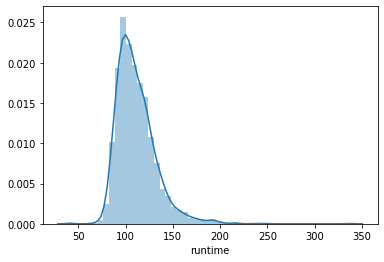

In [29]:
sns.distplot(data2.runtime)

Observations:
- The average runtime for a movie is 111 minutes
- The shortest movie duration recorded in this dataset is 41 minutes
- The longest movie duration recorded in this dataset is 338 minutes

### Compare runtime against budget, revenue and ROI

How does budget, revenue and ROI affect the runtime of a movie

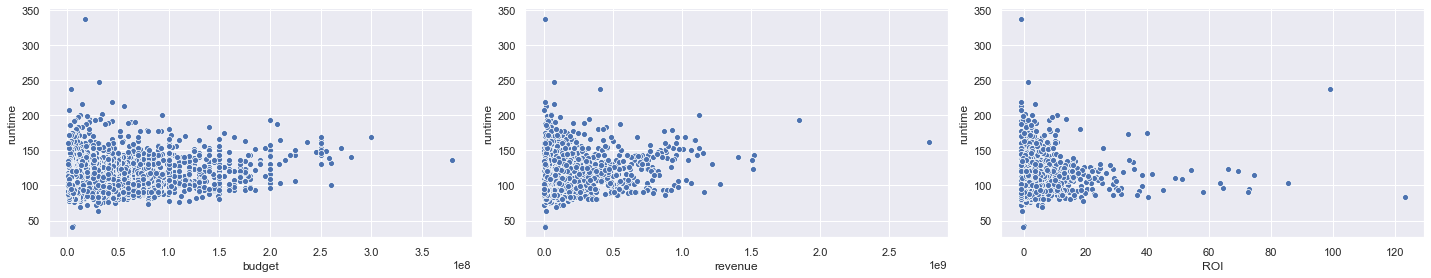

In [45]:
figure, ax=plt.subplots(1,3)
figure.set_size_inches(20, 4)
sns.set(font_scale=0.9)
sns.scatterplot(x='budget', y='runtime', data=data2, ax=ax[0])
sns.scatterplot(x='revenue', y='runtime', data=data2, ax=ax[1])
sns.scatterplot(x='ROI', y='runtime', data=data2, ax=ax[2])
figure.tight_layout()

Observation:
- A majority of movies have a runtime between 100 to 200 minutes regardless of the budget, revenue and ROI

## Revenue

In [47]:
data2['revenue'].describe()

count    3.078000e+03
mean     1.264118e+08
std      1.891239e+08
min      1.487300e+04
25%      1.947876e+07
50%      6.023683e+07
75%      1.521287e+08
max      2.787965e+09
Name: revenue, dtype: float64

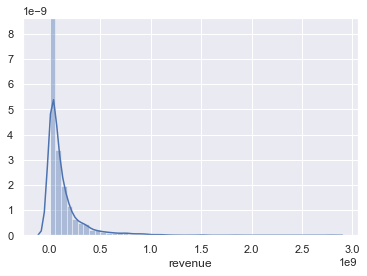

In [48]:
sns.distplot(data2.revenue)

Observations:
- A movie on average has a revenue of 126 million dollars
- The most revenue earned in a movie is 2 billion dollars
- The least revenue earned in a movie is 14 thousand dollars

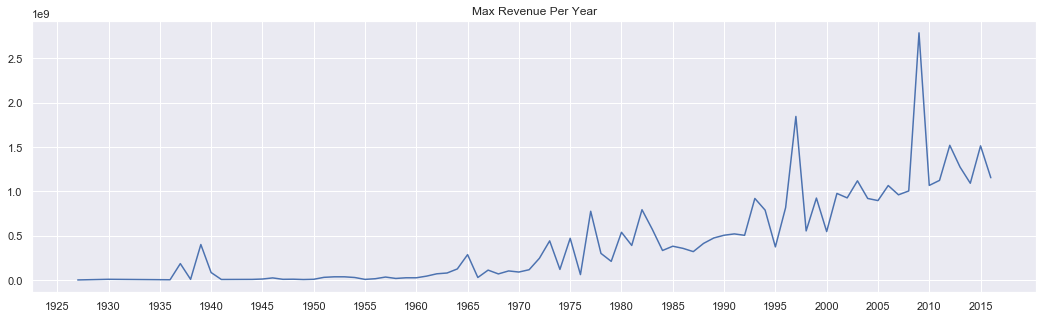

In [49]:
revenue_data = (data2[data2['revenue'].notnull()][['revenue', 'year']]
                .groupby('year')['revenue']
                .max()
               )
plt.figure(figsize=(18, 5))
plt.xticks(np.arange(1920, 2018, 5))
plt.plot(revenue_data)
plt.title('Max Revenue Per Year')
plt.show()

Observations:
- The was not much movies made in the early 1900s besides for 1935-1940
- The revenue appears to have started arising in the 1960s
- There was a spike in revenue in the late 1990s and early 2000s

In [50]:
data[(data['year'].between(1995, 2010)) & (data['revenue']>=1.5e9)][['title', 'revenue', 'year']]

,title,revenue,year
0,Avatar,2.787965e+09,2009.0
25,Titanic,1.845034e+09,1997.0


Finding:
- The two spikes mentioned previously are the movies Titanic and Avatar

## Movie Success

### Highest Return of Investment movies

Sort movie data by ROI in descending order and display the top 10 movies, considering movies with budget greater than 1 million dollars.

In [51]:
top_ROI = (data2[(data2['budget']>1e6)][['title', 'budget', 'revenue', 'ROI', 'year']]
           .sort_values(by='ROI', ascending=False)
          )
top_ROI.head(10)

,title,budget,revenue,ROI,year
4259,Snow White and the Seven Dwarfs,1488423.0,184925486.0,123.242561,1937.0
3813,Gone with the Wind,4000000.0,400176459.0,99.044115,1939.0
4291,Saw,1200000.0,103911669.0,85.593058,2004.0
2967,E.T. the Extra-Terrestrial,10500000.0,792910554.0,74.515291,1982.0
3593,My Big Fat Greek Wedding,5000000.0,368744044.0,72.748809,2002.0
3824,The Full Monty,3500000.0,257850122.0,72.671463,1997.0
2912,Star Wars,11000000.0,775398007.0,69.490728,1977.0
2809,Jaws,7000000.0,470654000.0,66.236286,1975.0
3202,Crocodile Dundee,5000000.0,328203506.0,64.640701,1986.0
4224,Insidious,1500000.0,97009150.0,63.672767,2010.0


### Lowest Return of Investment movies

Using the above dataframe with an additional condition of revenue being more than 10 thousand, display 10 movies with the lowest ROI value.

In [52]:
top_ROI[(top_ROI['revenue']>1e4)].sort_values(by='ROI', ascending=True).head(10)

,title,budget,revenue,ROI,year
2901,5 Days of War,20000000.0,17479.0,-0.999126,2011.0
1101,Foodfight!,65000000.0,73706.0,-0.998866,2012.0
2651,The Good Night,15000000.0,20380.0,-0.998641,2007.0
2650,All The Queen's Men,15000000.0,23000.0,-0.998467,2001.0
3120,Strangerland,10000000.0,17472.0,-0.998253,2015.0
2714,Margaret,14000000.0,46495.0,-0.996679,2011.0
1672,1911,30000000.0,108348.0,-0.996388,2011.0
3815,Major Dundee,3800000.0,14873.0,-0.996086,1965.0
3115,"An Alan Smithee Film: Burn, Hollywood, Burn",10000000.0,45779.0,-0.995422,1998.0
3399,The Boondock Saints,6000000.0,30471.0,-0.994922,1999.0


## Production Companies

In [53]:
# extract all values from production_companies column
prod_company_stack = (data['production_companies']
               .apply(pd.Series)
               .stack()
               .reset_index(level=1, drop=True)
              )
prod_company_stack.name = 'company'

# get frequency of each production_company
production_freq = (prod_company_stack
              .value_counts()
              .rename_axis('company')
              .reset_index(name='movie_count')
             )

prod_df = data.drop('production_companies', axis=1).join(prod_company_stack)
comp_revenue_sum = pd.DataFrame(prod_df
                                .groupby(by=['company'])['revenue']
                                .sum()
                                .sort_values(ascending=False)
                                .reset_index()
                               )

In [54]:
company_data = pd.merge(production_freq, comp_revenue_sum, on='company')
company_data.head(10)

,company,movie_count,revenue
0,Warner Bros.,319,4.915575e+10
1,Universal Pictures,311,4.258847e+10
2,Paramount Pictures,285,4.087852e+10
3,Twentieth Century Fox Film Corporation,222,3.935715e+10
4,Columbia Pictures,201,2.859963e+10
5,New Line Cinema,165,1.944487e+10
6,Metro-Goldwyn-Mayer (MGM),122,1.003947e+10
7,Touchstone Pictures,118,1.056499e+10
8,Walt Disney Pictures,114,2.868326e+10
9,Relativity Media,102,1.276101e+10


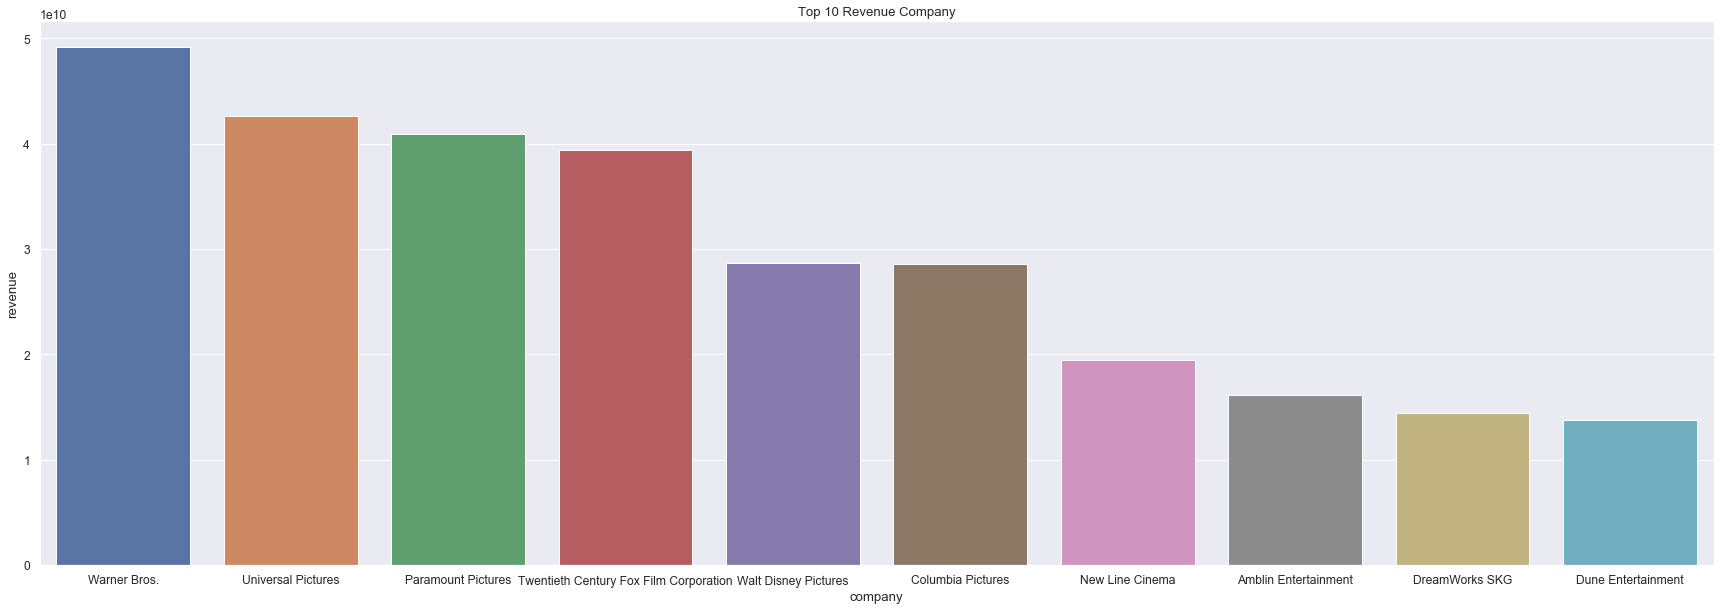

In [62]:
plt.figure(figsize=(30, 10))
sns.set(font_scale=1.1)
sns.barplot(data=comp_revenue_sum.head(10),
            x='company',
            y='revenue').set_title('Top 10 Revenue Company')
plt.show()

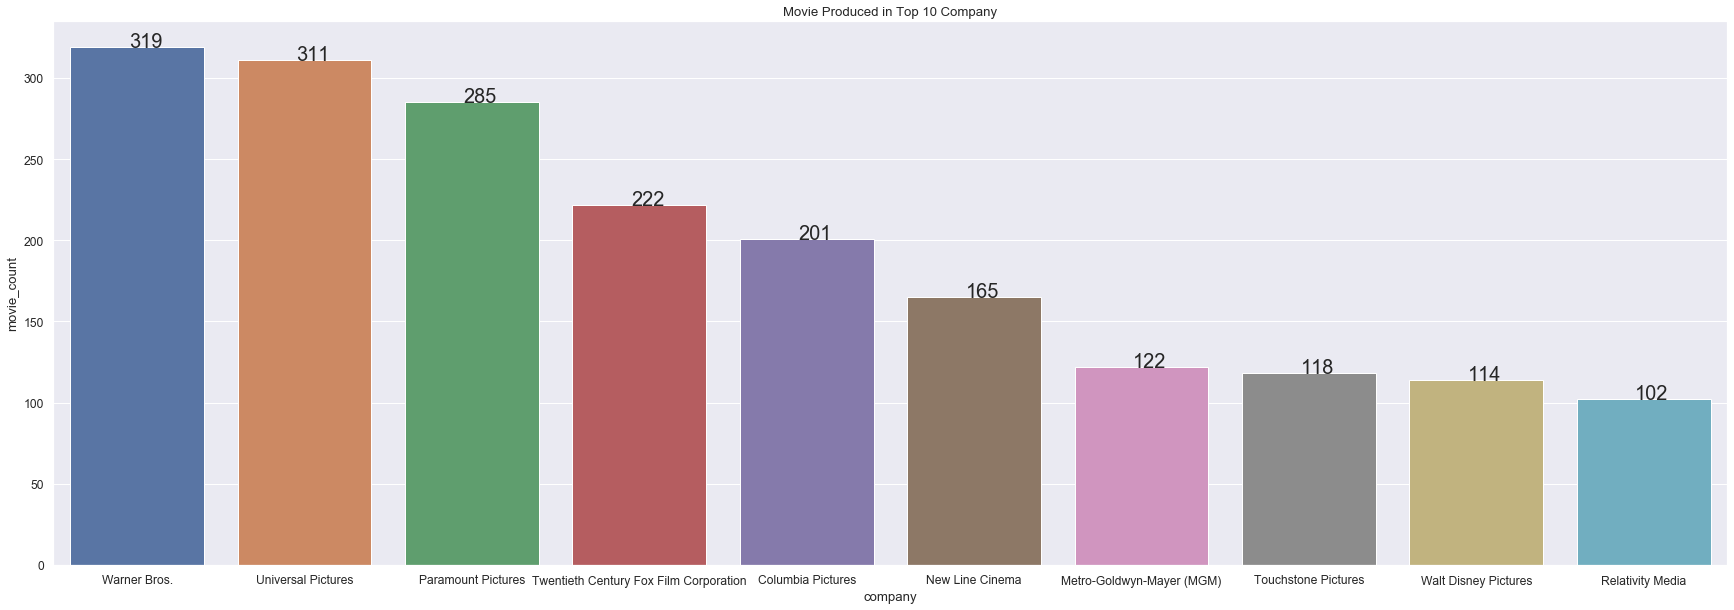

In [65]:
y=production_freq.head(10)['movie_count'].values.tolist()
plt.figure(figsize=(30, 10))
sns.set(font_scale=1.1)
sns.barplot(data=production_freq.head(10),
            x='company',
            y='movie_count').set_title('Movie Produced in Top 10 Company')
for a,b in enumerate(y):
    plt.text(a - 0.05, b, str(b), fontsize=20)
plt.show()

## Genres

In [66]:
# extract all values from genres column
genre_stack = (data['genres']
               .apply(pd.Series)
               .stack()
               .reset_index(level=1, drop=True)
              )

# get frequency of each genre
genre_freq = (genre_stack
              .value_counts()
              .rename_axis('genre')
              .reset_index(name='movie_count')
             )

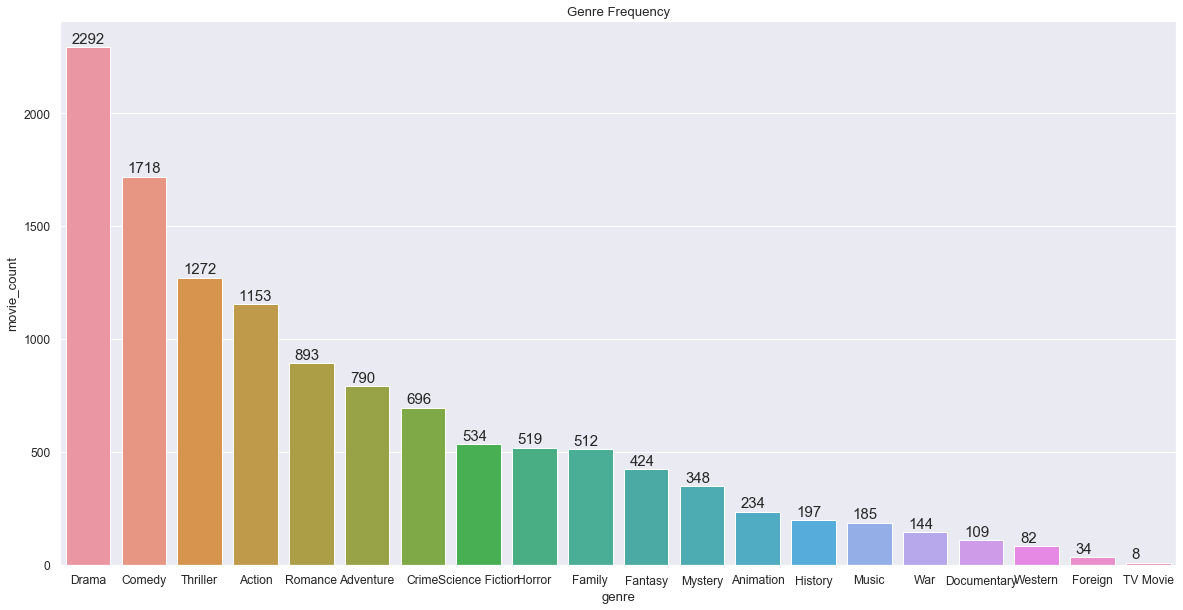

In [67]:
plt.figure(figsize=(20, 10))
x =genre_freq['genre'].values.tolist()
y=genre_freq['movie_count'].values.tolist()
sns.barplot(data=genre_freq, x='genre', y='movie_count').set_title('Genre Frequency')
for a,b in enumerate(y):
    plt.text(a - 0.3, b + 20, str(b), fontsize=15)
plt.show()

Observations:
- The most frequently procuded movies have a genre of drama
- Thriller and Action are similar in number. The same goes for Science Fiction, horror and family
- Some of the least used genres are TV Movie, Foreign and Western

### Genre Revenue

In [68]:
genre_stack = (data['genres']
               .apply(pd.Series)
               .stack()
               .reset_index(level=1, drop=True)
              )
genre_stack.name = 'genre'

genre_df = data.drop('genres', axis=1).join(genre_stack)
genre_rev = pd.DataFrame(genre_df
                                .groupby(by=['genre'])['revenue']
                                .sum()
                                .sort_values(ascending=False)
                                .reset_index()
                               )

In [69]:
genre_data = pd.merge(genre_freq, genre_rev, on='genre')
genre_data[(genre_data['genre'] == 'TV Movie')]

,genre,movie_count,revenue
19,TV Movie,8,0.0


Finding:
- None of the TV Movies have reported revenue, so I will exclude this genre in the following plots

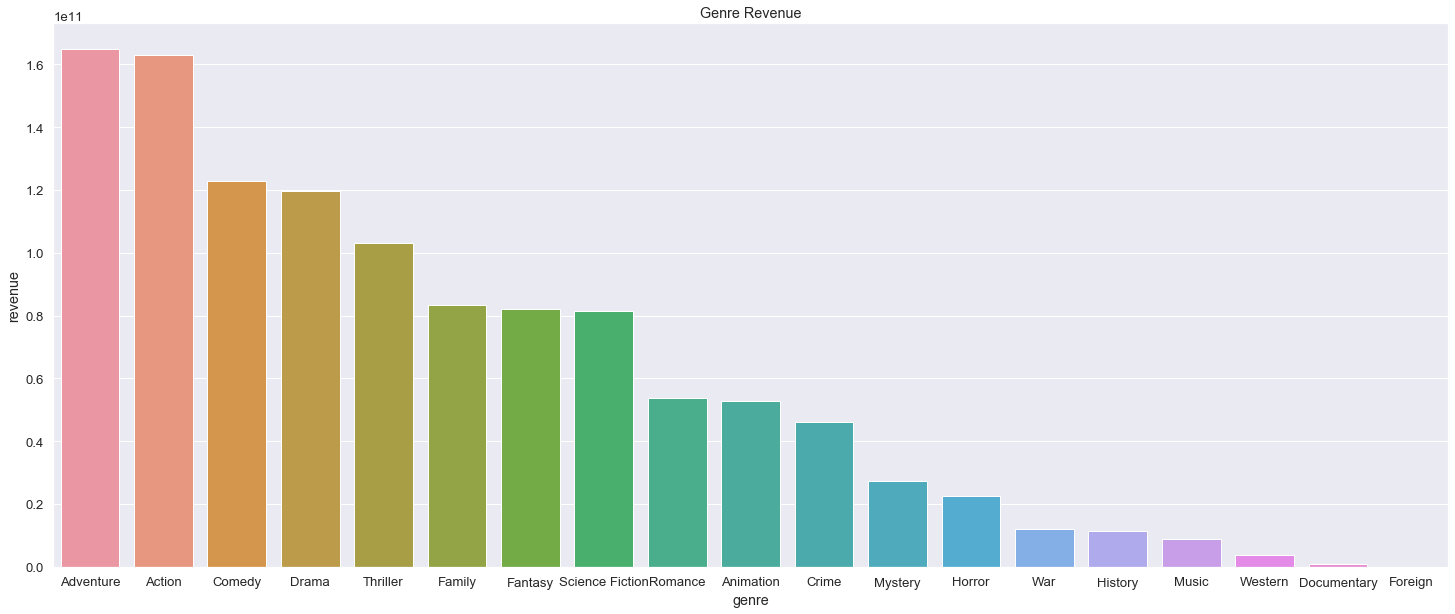

In [84]:
plt.figure(figsize=(25, 10))
sns.set(font_scale=1.2)
sns.barplot(data=genre_rev[genre_rev['genre']!='TV Movie'], x='genre', y='revenue').set_title('Genre Revenue')
plt.show()

Observations:
- Adventure and action movies made the mosts revenue
- Next two highest revenue making revenues are Comedy and Drama
- Family, Fantasy and Science Fiction has about the same revenue
- Foreign and TV Movie has almost no revenue

In the following I want to find out which movie genres has made an average revenue greater or equal to 126 million dollars(the average revenue per movie found in previous section)

In [76]:
gen_rev_count = pd.merge(genre_rev, genre_freq, on='genre')
gen_rev_count['average_revenue'] = gen_rev_count['revenue']/gen_rev_count['movie_count']

In [77]:
gen_rev_count[gen_rev_count['average_revenue']>=data['revenue'].mean()]

,genre,revenue,movie_count,average_revenue
0,Adventure,1.648416e+11,790,2.086602e+08
1,Action,1.629599e+11,1153,1.413356e+08
5,Family,8.328324e+10,512,1.626626e+08
6,Fantasy,8.198220e+10,424,1.933542e+08
7,Science Fiction,8.156424e+10,534,1.527420e+08
9,Animation,5.281217e+10,234,2.256930e+08


### Genre Budget

In [79]:
genre_budget = pd.DataFrame(genre_df
                                .groupby(by=['genre'])['budget']
                                .sum()
                                .sort_values(ascending=False)
                                .reset_index()
                               )

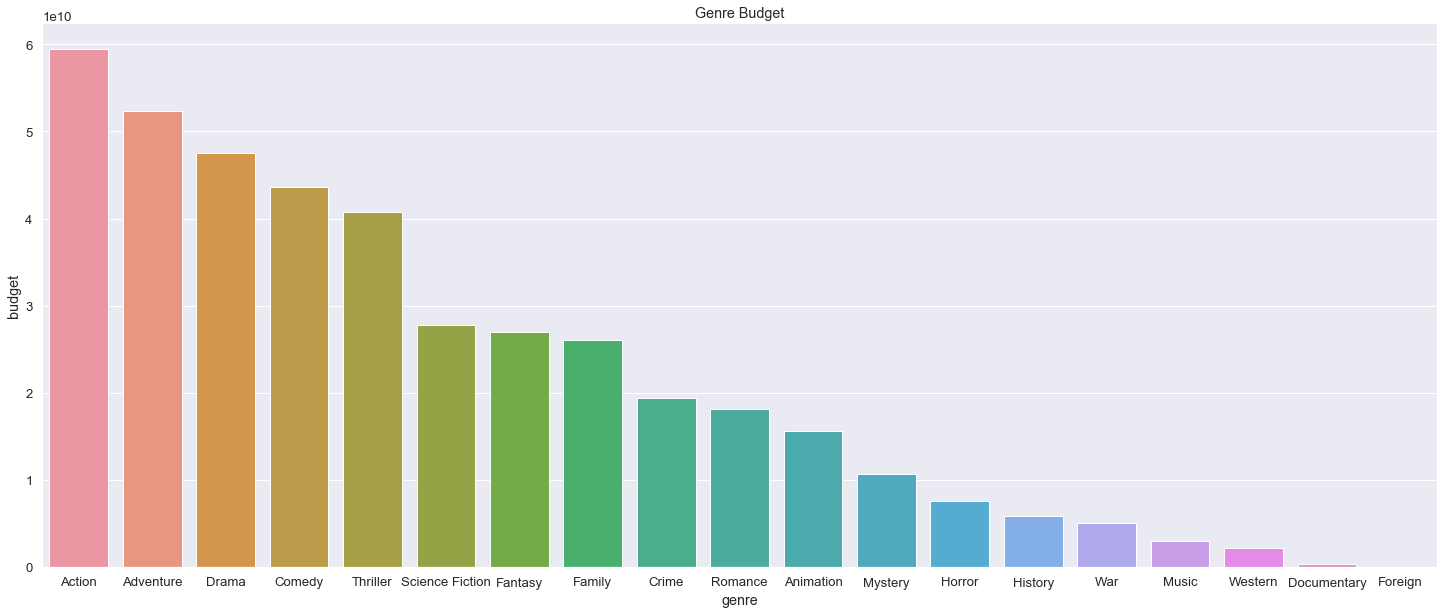

In [83]:
plt.figure(figsize=(25, 10))
sns.set(font_scale=1.2)
sns.barplot(data=genre_budget[genre_budget['genre']!='TV Movie'], x='genre', y='budget').set_title('Genre Budget')
plt.show()

Observation:
- The top 5 genres are the same as above for revenue, with some positions swapped

### Genre ROI

In [85]:
genre_ROI = pd.DataFrame(genre_df
                                .groupby(by=['genre'])['ROI']
                                .mean()
                                .sort_values(ascending=False)
                                .reset_index()
                               )

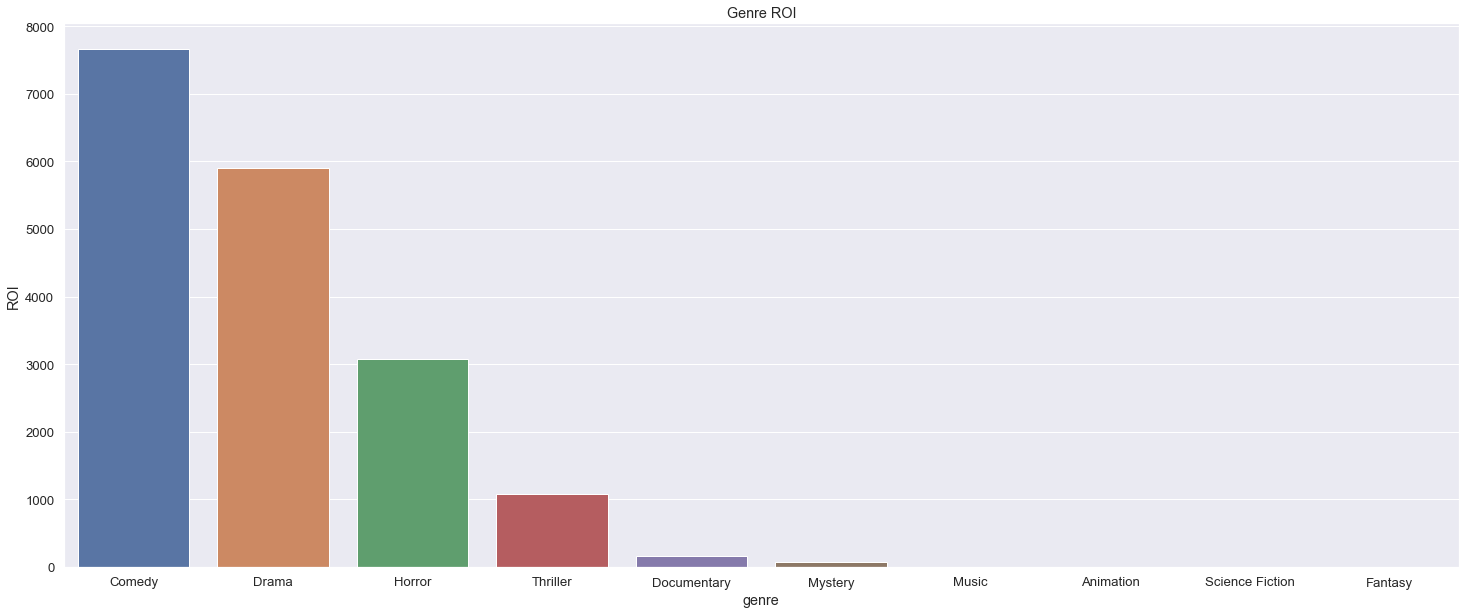

In [86]:
plt.figure(figsize=(25, 10))
sns.barplot(data=genre_ROI.head(10), x='genre', y='ROI').set_title('Genre ROI')
plt.show()

### Genre Popularity

In [87]:
genre_popularity = pd.DataFrame(genre_df
                                .groupby(by=['genre'])['popularity']
                                .sum()
                                .sort_values(ascending=False)
                                .reset_index()
                               )

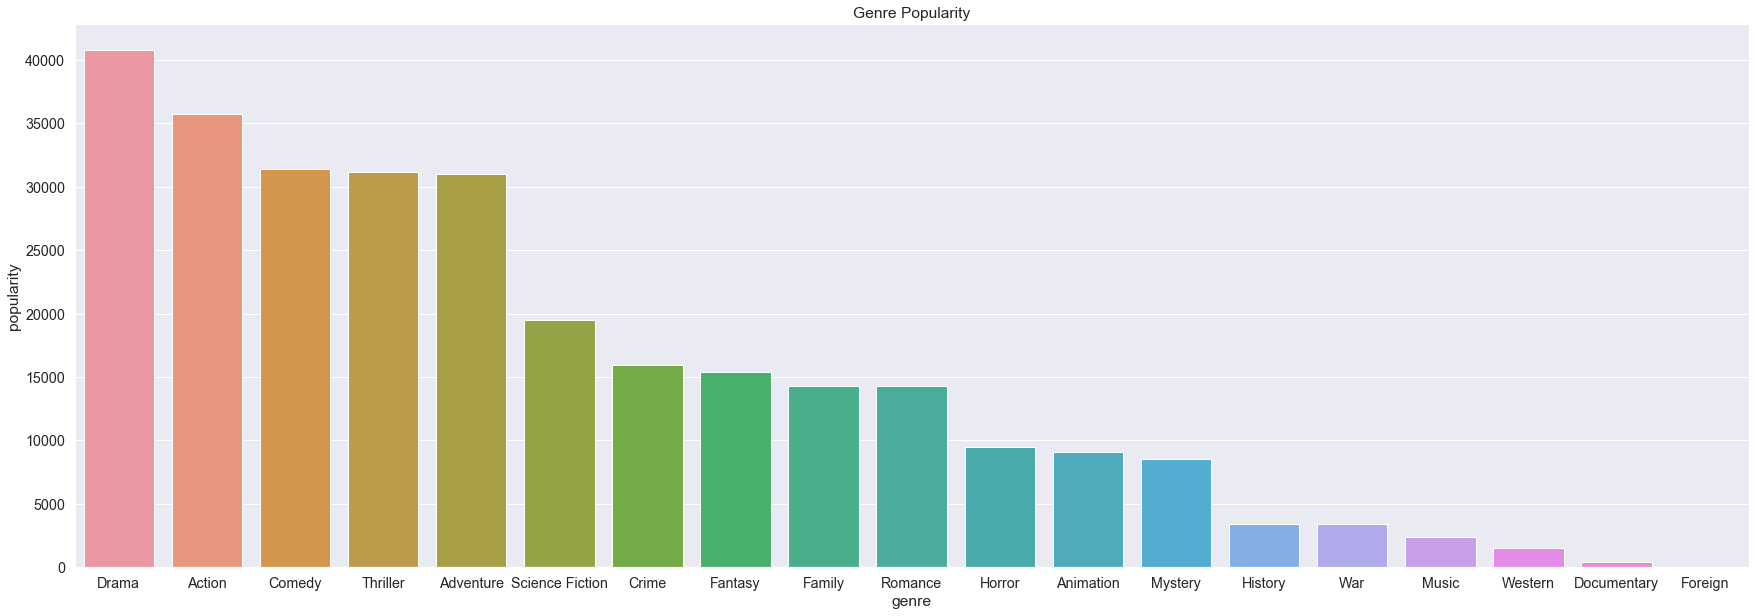

In [97]:
plt.figure(figsize=(30, 10))
sns.set(font_scale=1.3)
sns.barplot(data=genre_popularity[genre_popularity['genre']!='TV Movie'],
            x='genre',
            y='popularity').set_title('Genre Popularity')
plt.show()

## Budget

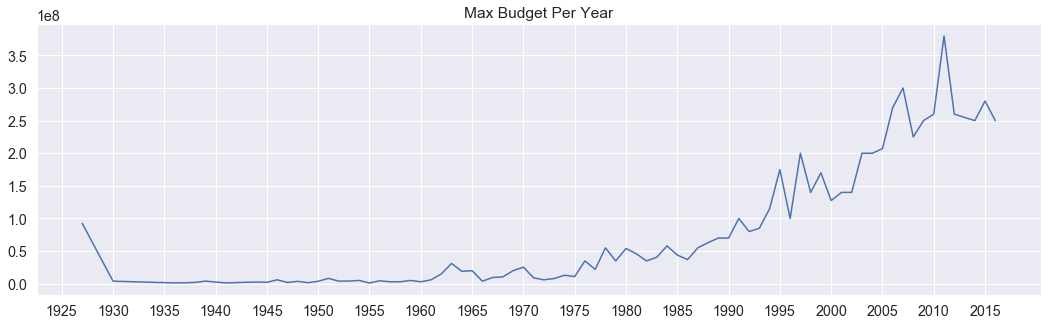

In [98]:
budget_data = (data2[data2['budget'].notnull()][['budget', 'year']]
                .groupby('year')['budget']
                .max()
               )
plt.figure(figsize=(18, 5))
plt.xticks(np.arange(1920, 2018, 5))
plt.plot(budget_data)
plt.title('Max Budget Per Year')
plt.show()

Observations:
- The budget started increasing in the 1960s.
- There was a spike in the late 1990s and early 2000s
- The trend is similar to the graph of max revenue per year

### Budget against revenue and ROI

How does the budget of each movie affect the corresponding revenue and Return of Investment

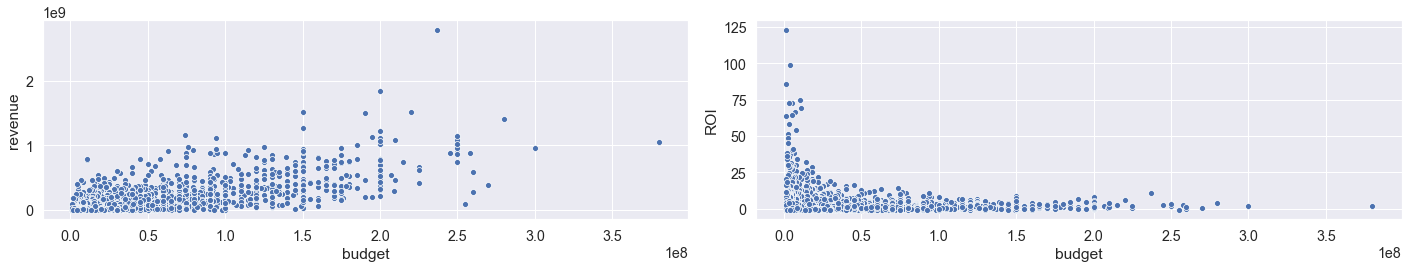

In [99]:
figure, ax=plt.subplots(1,2)
figure.set_size_inches(20, 4)
sns.scatterplot(x='budget', y='revenue', data=data2, ax=ax[0])
sns.scatterplot(x='budget', y='ROI', data=data2, ax=ax[1])
figure.tight_layout()

Observations:
- positive linear relationship between budget and revenue

# Regression

In this section I will train a gradient boosting regressor to predict the revenue of a movie using the features explored in previous sections.

In [366]:
df2 = data[(data['revenue'].notnull()) & (data['budget'].notnull())]
df2 = df2.drop(['cast', 'crew','spoken_languages', 'tagline', 'status', 'year', 'month'], axis=1)

In [339]:
#success = []
#for roi in df2['ROI']:
#    if roi>=1:
#        success.append(1)
#    else:
#        success.append(0)
#df2['movie_success'] =success

In [367]:
genres = genre_freq['genre'].values.tolist()
success_genres = genre_rev['genre'].head(5).values.tolist()

In [368]:
successful_gen = []
for movie_gen in df2['genres']:
    if any(item in success_genres for item in movie_gen):
        successful_gen.append(1)
    else:
        successful_gen.append(0)
df2['successful_gen'] = successful_gen

In [343]:
top_company = comp_revenue_sum.head(5)['company'].values.tolist()

In [344]:
in_top_company = []
for company in df2['production_companies']:
    if any(item in top_company for item in company):
        in_top_company.append(1)
    else:
        in_top_company.append(0)
df2['in_top_company'] = in_top_company

In [345]:
df2 = df2.drop(columns =['genres', 'ROI', 'production_companies', 'keywords', 'overview','production_countries', 'title'], axis=1)

In [346]:
df2.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,successful_gen,in_top_company
0,237000000.0,150.437577,2.787965e+09,162.0,7.2,11800,1,1
1,300000000.0,139.082615,9.610000e+08,169.0,6.9,4500,1,1
2,245000000.0,107.376788,8.806746e+08,148.0,6.3,4466,1,0
3,250000000.0,112.312950,1.084939e+09,165.0,7.6,9106,1,1
4,260000000.0,43.926995,2.841391e+08,132.0,6.1,2124,1,1


### Correlation Matrix

In [347]:
corr = df2.corr()
corr.shape

(8, 8)

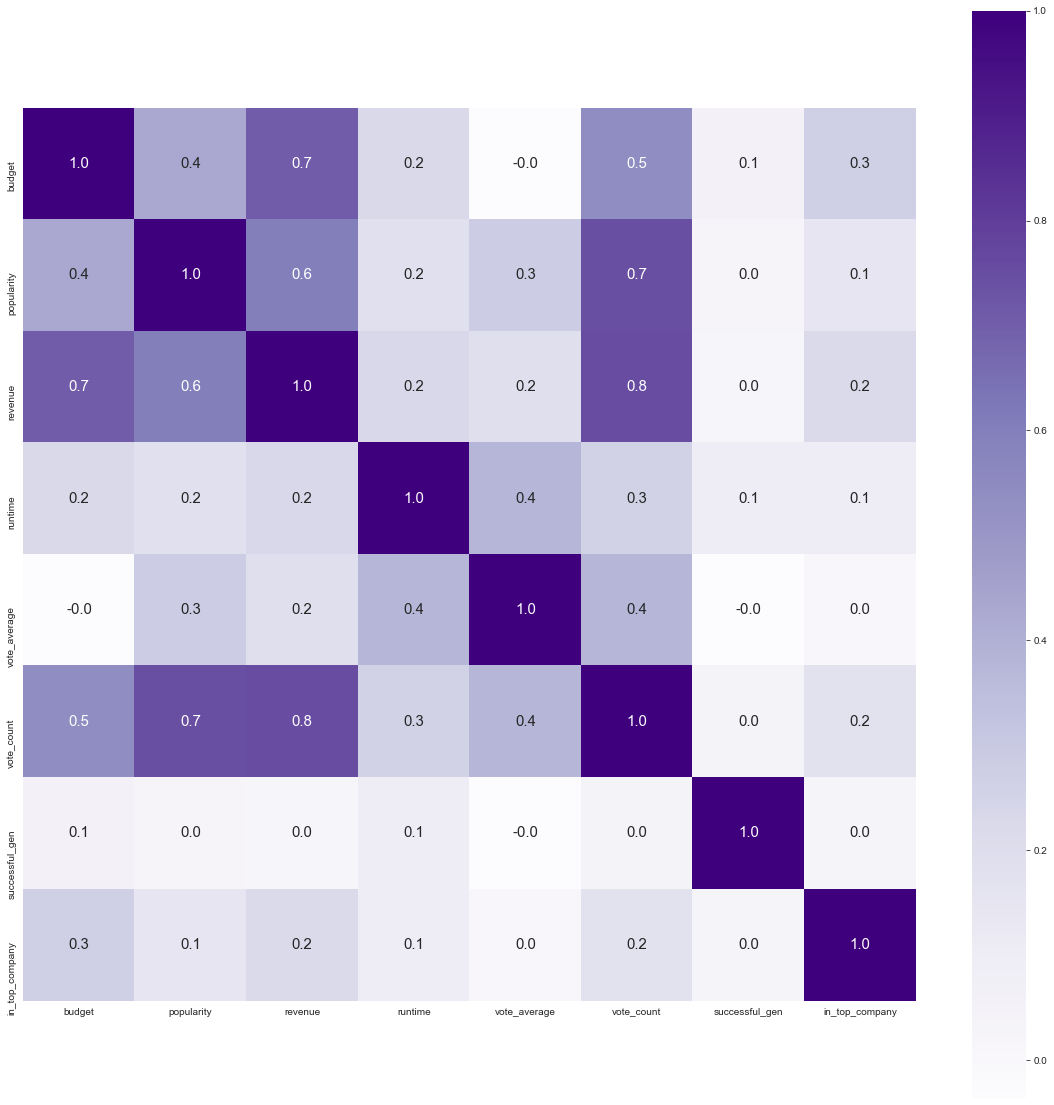

In [348]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,
            cbar=True,
            square= True,
            fmt='.1f',
            annot=True,
            annot_kws={'size':15},
            cmap='Purples')

In [349]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV 

In [350]:
X = df2.drop('revenue', axis=1)
Y = df2['revenue']

In [369]:
# Split dataset into train and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state = 2)

### Grid Search

In this section I will perform a grid search to find the best hyperparameters for this dataset

In [139]:
gbr = ensemble.GradientBoostingRegressor()
param = {
    'n_estimators' : [10, 100, 1000],
    'learning_rate' : [0.1, 0.05, 0.02, 0.01],
    'max_depth' : [4, 6, 8],
    'min_samples_leaf': [3, 5, 9, 17],
    'max_features': [0.01, 0.3, 1],
    'loss': ['ls', 'lad', 'huber', 'quantile']
}

gs = GridSearchCV(gbr, param, cv=5, n_jobs=-1)
cv_fit = gs.fit(x_train, y_train)
print("Best Parameters")
print(gs.best_estimator_)

Best Parameters
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=8,
                          max_features=0.01, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=9, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [140]:
gs.best_estimator_.score(x_train, y_train) 

0.8644817914608829

### GradientBoostingRegressor

fitting the regression model using the parameters found above

In [352]:
# fit regression model
model = ensemble.GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=8,
                          max_features=0.01, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=9, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [353]:
model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=8,
                          max_features=0.01, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=9, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [371]:
# Model prediction on train data
y_pred = model.predict(x_train)

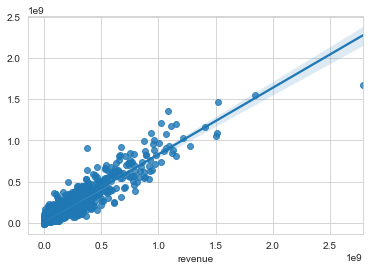

In [364]:
sns.regplot(y_train, y_pred)

In [370]:
#Predicting Test data with the model
y_test_pred = model.predict(x_test)

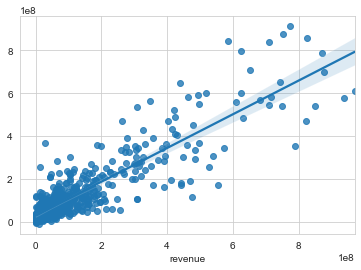

In [356]:
sns.regplot(y_test, y_test_pred)

###  Coefficient of Determination

In [357]:
print ("R-squared for Train: %.2f" %model.score(x_train, y_train))
print ("R-squared for Test: %.2f" %model.score(x_test, y_test))

R-squared for Train: 0.87
R-squared for Test: 0.78


In [358]:
print( "Feature Importances")
model.feature_importances_

Feature Importances


array([0.36434381, 0.19194723, 0.0707928 , 0.05397693, 0.29195483,
       0.00085889, 0.02612551])

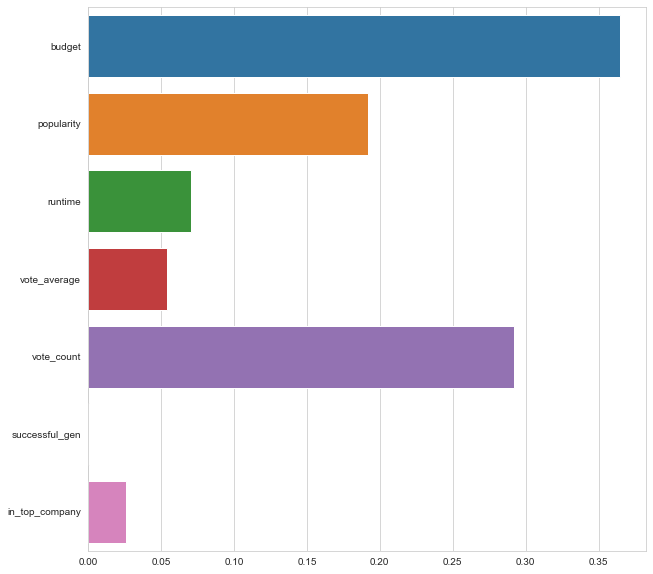

In [363]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.barplot(x=model.feature_importances_, y=X.columns)